In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
from glob import glob
import IPython.display as ipd
import librosa.display

In [146]:
# Reading the normal audio files in an array.
data_dir = "0_dB_slider/slider/id_02/normal"
norm_audio_files = glob(data_dir + '/*.wav')
x = len(norm_audio_files)
x

1068

In [133]:
data_dir = "0_dB_valve/valve/id_04/abnormal"
abnorm_audio_files = glob(data_dir + '/*.wav')
y = len(abnorm_audio_files)
y

120

### Display waveplot for one sound file.

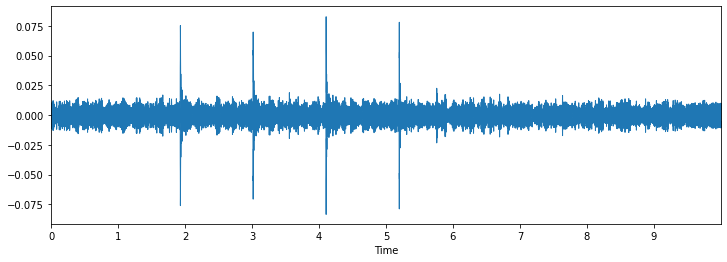

In [6]:
# Amplitude and frequency are important parameters of
# the sound and are unique for each audio.

plt.figure(figsize = (12,4))

# .load loads an audio file and decodes it into a 1-dimensional array which is a time series x ,
# and sr is a sampling rate of x . Default sris 22kHz.

data, sample_rate = librosa.load(norm_audio_files[0])

librosa.display.waveplot(data, sr=sample_rate) # is used to plot waveform of amplitude vs time
ipd.Audio(norm_audio_files[0]) # To play an audio.

In [7]:
sample_rate

22050

In [8]:
data

array([ 0.00317084,  0.00359004,  0.00331801, ..., -0.00371406,
       -0.0052524 , -0.00363273], dtype=float32)

### Display Spectogram.

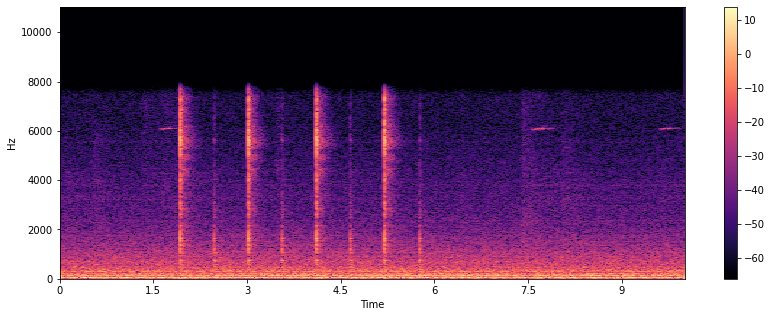

In [9]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Features extraction

https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [ ]:
""" Extraction of features is a very important part in analyzing and finding relations between different things.
    The data provided of audio cannot be understood by the models directly 
    to convert them into an understandable format feature extraction is used. 
    It is a process that explains most of the data but in an understandable way. 
    Feature extraction is required for classification, prediction and recommendation algorithms.
"""

#### Zero Crossing Rate.

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.

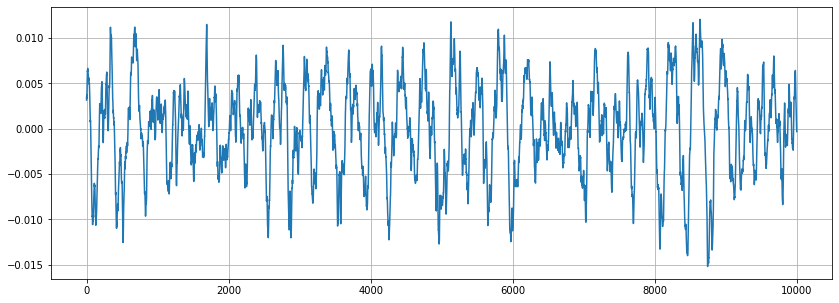

In [10]:
# Zooming in
n0 = 0
n1 = 10000
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

As we can see there are 7 zero crossings in the given graph, when we check for 50 hz of audio file1

We can also calculate zero crossings using a given code:

In [11]:
def zero_crossing_rate(file_name):
    data, sample_rate = librosa.load(file_name)
    zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
    return sum(zero_crossings)

#### Spectral Centroid.

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end

In [35]:
def spec_centroid(file_name):
    data, sample_rate = librosa.load(file_name)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
    return spectral_centroids

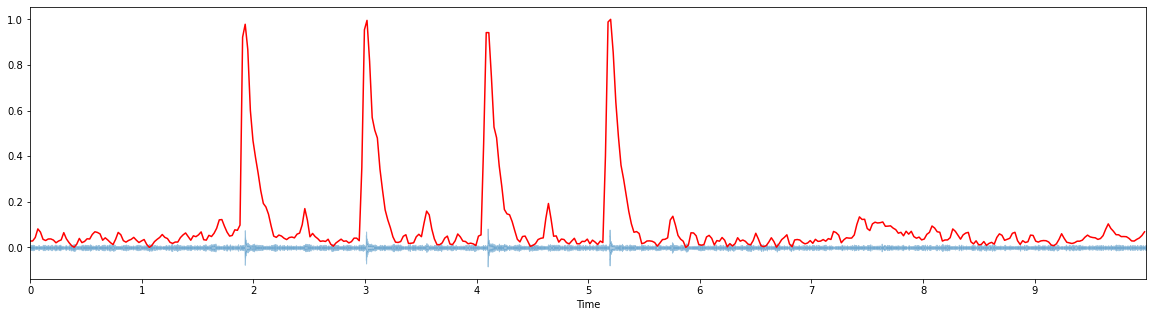

In [24]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
import sklearn
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


#### Spectral Rolloff

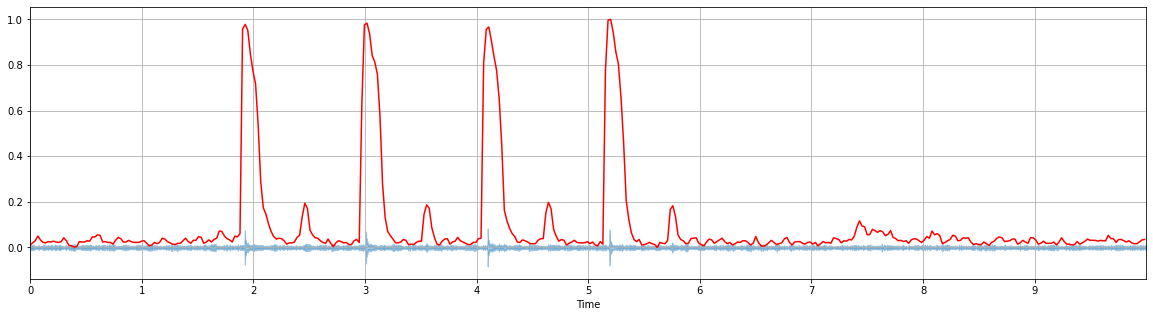

In [34]:
plt.figure(figsize=(20,5))
def spec_rolloff(file_name):
    data, sample_rate = librosa.load(file_name)
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)[0]
    return  spectral_rolloff

librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

#### Root mean sqaure energy

In [33]:
# Extract RMSE with librosa

def rmse(file_name):
    data, sample_rate = librosa.load(file_name)
    rms_audio = librosa.feature.rms(y = data)[0]
    return rms_audio

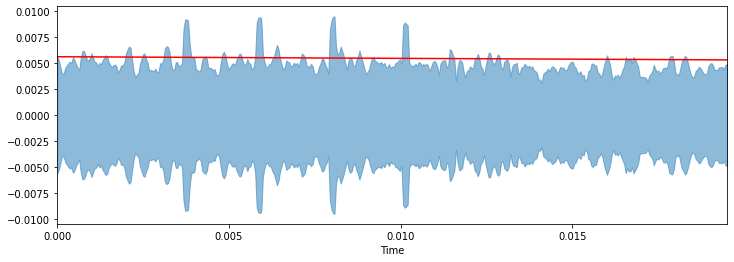

In [30]:
# Plot the RMS for an audio file

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(12,4))
librosa.display.waveplot(rms_audio,alpha = 0.5)
plt.plot(t, rms_audio,color="r")
plt.show()


In [ ]:
def flatness(file_name):
    data, sample_rate = librosa.load(file_name)
    flatness = librosa.feature.spectral_flatness(y=data)[0]
    return flatness

Now we loop through all the normal and abnormal sound waves and create a csv file

In [36]:
# Now we iterate through every audio file in NORMAL folder and extract features
from tqdm import tqdm
extracted_feature = []
for file in tqdm(norm_audio_files):
    file_name = file
    class_label = 0 # 0 for normal.
    zcr = zero_crossing_rate(file_name)
    
    spec_cent = spec_centroid(file_name)
    spec_cent_min = spec_cent.min()
    spec_cent_max = spec_cent.max()
    spec_cent_mean = spec_cent.mean()
    spec_cent_std = spec_cent.std()
    
    spec_roll = spec_rolloff(file_name)
    spec_roll_min = spec_roll.min() 
    spec_roll_max = spec_roll.max() 
    spec_roll_mean = spec_roll.mean() 
    spec_roll_std = spec_roll.std() 
    
    rms = rmse(file_name)
    rms_mean = rms.mean()
    
    extracted_feature.append([file_name, zcr, spec_cent_max, spec_cent_min, spec_cent_mean, spec_cent_std,
                              spec_roll_max, spec_roll_min, spec_roll_mean, spec_roll_std, rms_mean, class_label])


100%|██████████████████████████████████████████████████████████████| 991/991 [24:37<00:00,  1.49s/it]


In [38]:
# Now we iterate through every audio file in ABNORMAL folder and extract features
for file in tqdm(abnorm_audio_files):
    file_name = file
    class_label = 1 # 0 for normal.
    zcr = zero_crossing_rate(file_name)
    
    spec_cent = spec_centroid(file_name)
    spec_cent_min = spec_cent.min()
    spec_cent_max = spec_cent.max()
    spec_cent_mean = spec_cent.mean()
    spec_cent_std = spec_cent.std()
    
    spec_roll = spec_rolloff(file_name)
    spec_roll_min = spec_roll.min() 
    spec_roll_max = spec_roll.max() 
    spec_roll_mean = spec_roll.mean() 
    spec_roll_std = spec_roll.std() 
    
    rms = rmse(file_name)
    rms_mean = rms.mean()
    
    extracted_feature.append([file_name, zcr, spec_cent_max, spec_cent_min, spec_cent_mean, spec_cent_std,
                              spec_roll_max, spec_roll_min, spec_roll_mean, spec_roll_std, rms_mean, class_label])


100%|██████████████████████████████████████████████████████████████| 119/119 [02:56<00:00,  1.49s/it]


In [124]:
# Now we iterate through every audio file in ABNORMAL folder and extract features
for file in tqdm(abnorm_audio_files):
    file_name = file
    class_label = 1 # 0 for normal.
    zcr = zero_crossing_rate(file_name)
    
    spec_cent = spec_centroid(file_name)
    spec_cent_min = spec_cent.min()
    #spec_cent_max = spec_cent.max()
    spec_cent_mean = spec_cent.mean()
    #spec_cent_std = spec_cent.std()
    
    spec_roll = spec_rolloff(file_name)
    spec_roll_min = spec_roll.min() 
    #spec_roll_max = spec_roll.max() 
    spec_roll_mean = spec_roll.mean() 
    #spec_roll_std = spec_roll.std() 
    
    rms = rmse(file_name)
    rms_mean = rms.mean()
    
    extracted_feature.append([file_name, zcr, spec_cent_min, spec_cent_mean,
                            spec_roll_min, spec_roll_mean, rms_mean, class_label])


100%|██████████████████████████████████████████████████████████████| 120/120 [04:24<00:00,  2.21s/it]


In [134]:
extracted_features_df = pd.DataFrame(extracted_feature,columns=['file_name', 'zcr', 'spec_cent_max', 'spec_cent_min',
                                                                'spec_cent_mean', 'spec_cent_std', 'spec_roll_max', 
                                                                'spec_roll_min', 'spec_roll_mean', 'spec_roll_std', 
                                                                'rms_mean', 'class'])
extracted_features_df.head()


file_name   zcr  spec_cent_max  \
0  0_dB_valve/valve/id_00/normal/00000773.wav   193    3979.841896   
1  0_dB_valve/valve/id_00/normal/00000632.wav  1084    4004.789910   
2  0_dB_valve/valve/id_00/normal/00000238.wav   507    3856.389818   
3  0_dB_valve/valve/id_00/normal/00000148.wav   552    3937.072218   
4  0_dB_valve/valve/id_00/normal/00000388.wav   583    4029.456123   

   spec_cent_min  spec_cent_mean  spec_cent_std  spec_roll_max  spec_roll_min  \
0     534.462569      842.763456     576.068203    6384.594727     559.863281   
1    1289.842708     1608.087992     445.638300    6384.594727    1733.422852   
2     893.401721     1333.155533     615.625554    6384.594727    1485.791016   
3     926.309215     1352.008946     632.210185    6384.594727    1507.324219   
4    1269.865358     1674.007315     561.092187    6556.860352    1744.189453   

   spec_roll_mean  spec_roll_std  rms_mean  class  
0     1104.613351    1206.337228  0.004988      0  
1     2564.174827     896.560428  0.004762      0  
2     2285.567154    1210.874875  0.005101      0  
3     2294.685042    1229.337405  0.005138      0  
4     2856.172056    1119.337739  0.005219      0

In [135]:
df = extracted_features_df
df.shape

(1230, 12)

In [136]:
df.to_csv("valve_features.csv" , index =False)

In [137]:
features = pd.read_csv("valve_features.csv")

In [138]:
# Separate features and target
X = features.iloc[:,1:10]
y = features.iloc[:,-1:]

In [140]:
# Split the data for train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [141]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [142]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# fit on training data column
scale = StandardScaler().fit(X_train_stand)
    
# transform the training data column
X_train_stand = scale.transform(X_train_stand)
    
# transform the testing data column
X_test_stand = scale.transform(X_test_stand)

In [143]:
# Use a KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=30)
KNN_model.fit(X_train_stand,y_train)
y_pred=KNN_model.predict(X_test_stand)

/home/arfa/anaconda3/envs/sound/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [144]:
# Evaluate your model
from sklearn.metrics import accuracy_score

print('Test accuracy for KNN is:',metrics.accuracy_score(y_test,y_pred)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


Test accuracy for KNN is: 95.9349593495935

Confusion matrix:
 [[199   1]
 [  9  37]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       200
           1       0.97      0.80      0.88        46

    accuracy                           0.96       246
   macro avg       0.97      0.90      0.93       246
weighted avg       0.96      0.96      0.96       246



In [145]:
# Scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:>

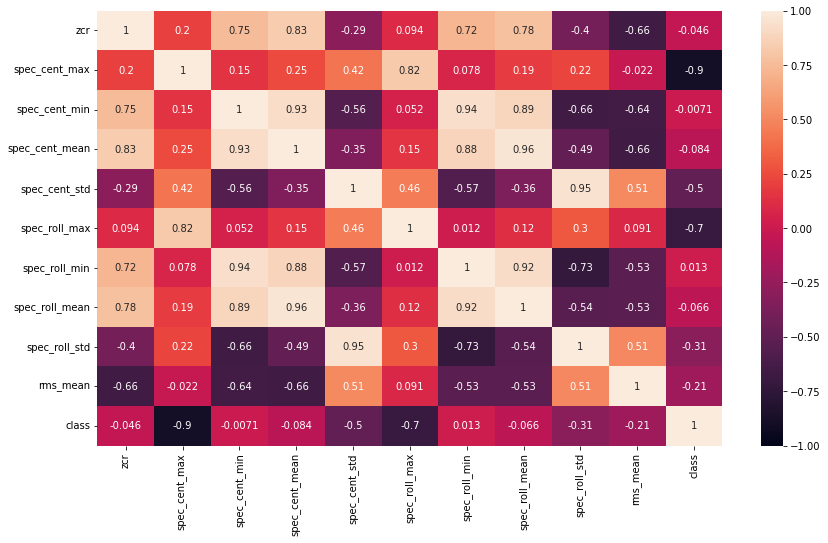

In [76]:
correlation = features.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,linewidth=0,vmin=-1)

In [77]:
correlation['class'].sort_values(ascending = False)

class             1.000000
spec_roll_min     0.013026
spec_cent_min    -0.007099
zcr              -0.046327
spec_roll_mean   -0.065959
spec_cent_mean   -0.084254
rms_mean         -0.206917
spec_roll_std    -0.305984
spec_cent_std    -0.497810
spec_roll_max    -0.696445
spec_cent_max    -0.898172
Name: class, dtype: float64

In [78]:
features.drop('spec_roll_std', inplace=True, axis=1)

In [79]:
features.drop('spec_roll_max', inplace=True, axis=1)
features.drop('spec_cent_std', inplace=True, axis=1)
features.drop('spec_cent_max', inplace=True, axis=1)

In [87]:
features.drop('rms_mean', inplace=True, axis=1)

In [89]:
# Separate features and target
X = features.iloc[:,1:5]
y = features.iloc[:,-1:]

In [90]:
# Import the libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
# Split the data for train and test

X_train,X_test,y_train,y_test = train_test_split(x_std,y,test_size=.3,random_state=1)
y_train.shape

#scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train_norm, y_train)
# Predict
y_pred1 = model1.predict(X_test_norm)

#Evaluation of the model

print('Test accuracy for Decision tree is:',metrics.accuracy_score(y_test,y_pred1)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred1))
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred1))



Test accuracy for Decision tree is: 99.54954954954955

Confusion matrix:
 [[198   1]
 [  0  23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.96      1.00      0.98        23

    accuracy                           1.00       222
   macro avg       0.98      1.00      0.99       222
weighted avg       1.00      1.00      1.00       222



In [99]:
# From sklearn- Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3)
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

/tmp/ipykernel_562408/3263593762.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_norm, y_train)


In [100]:
#Evaluation of the model

print('Test accuracy for Random Forest is:',metrics.accuracy_score(y_test,y_pred)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


Test accuracy for Random Forest is: 100.0

Confusion matrix:
 [[199   0]
 [  0  23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00        23

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In [101]:
from sklearn.naive_bayes import  GaussianNB
#Fit the model
nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB(priors=None)

GaussianNB()

#predict
y1_pred = nb.predict(X_test)

#evaluation

print('\nTest accuracy for Naive Bbayes model is:',metrics.accuracy_score(y_test,y1_pred)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y1_pred))
print('\n Classification Report: \n',metrics.classification_report(y_test,y1_pred))




Test accuracy for Naive Bbayes model is: 98.1981981981982

Confusion matrix:
 [[195   4]
 [  0  23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       199
           1       0.85      1.00      0.92        23

    accuracy                           0.98       222
   macro avg       0.93      0.99      0.95       222
weighted avg       0.98      0.98      0.98       222



/home/arfa/anaconda3/envs/sound/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
